# Coronavirus 
___
Coronavirus COVID-19 (2019-nCoV)  
COVID-19 Data for South Africa
### About Notebook
The goal here is to explore data for Coronavirus spread in South Africa, this notebook will be updated as time goes, Site to know more about Coronavirus https://www.who.int/health-topics/coronavirus

___
### Load Packages
Let's load packages that we need to achieve the goal above

In [6]:
import os
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
#from scripts import graphs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_colwidth = 100

### Data 
___
Let's check the data, we may have multiple files in the data directory 

In [7]:
os.listdir('../data')

['add_geo_subdivision.py',
 'calc',
 'covid19za_provincial_cumulative_timeline_confirmed.csv',
 'covid19za_provincial_cumulative_timeline_deaths.csv',
 'covid19za_provincial_cumulative_timeline_recoveries.csv',
 'covid19za_provincial_cumulative_timeline_testing.csv',
 'covid19za_provincial_cumulative_timeline_vaccination.csv',
 'covid19za_provincial_raw_hospitalization.csv',
 'covid19za_provincial_timeline_testing.csv',
 'covid19za_provincial_timeline_testing_positivityrate.csv',
 'covid19za_timeline_confirmed.csv',
 'covid19za_timeline_deaths.csv',
 'covid19za_timeline_death_statistics.csv',
 'covid19za_timeline_testing.csv',
 'covid19za_timeline_transmission_type.csv',
 'covid19za_timeline_vaccination.csv',
 'covid19za_travel_locations_coordinates.csv',
 'district_data',
 'doh_annual_report_data',
 'doh_pdf',
 'doh_whatsapp',
 'external_data',
 'health_system_za_changes.txt',
 'health_system_za_district_counts.csv',
 'health_system_za_field_hospitals.csv',
 'health_system_za_hospital

We have one CSV file that the data, let's use this data

### Load data
___
Let's load data 

In [8]:
df = pd.read_csv('../data/nicd_hospital_surveillance_data.csv')
#df_tests = pd.read_csv('../data/covid19za_timeline_testing.csv')
#df_travel = pd.read_csv('../data/covid19za_travel_locations_coordinates.csv')

### Partial View of Data
___
Let's see how the data is formatted

In [26]:
df[ ' source'][0]

' https://www.nicd.ac.za/wp-content/uploads/2020/05/NICD-COVID-19-Daily-Sentinel-Hospital-Surveillance-report-National-20200524.pdf'

In [21]:
df[' num_discharged_alive']

#df.columns

0        2995
1        3164
2        3386
3        3746
4        4089
        ...  
861    531508
862    531563
863    531595
864    531628
865    531644
Length: 866, dtype: int64

In [51]:
df.columns

Index(['date', ' YYYYMMDD', ' total_admissions', ' WC', ' EC', ' GP', ' KZN',
       ' LP', ' FS', ' MP', ' NW', ' NC', ' current_num_in_hospital',
       ' general', ' high_care', ' ICU', ' isolation',
       ' total_healthcare_workers_admitted', ' num_discharged_alive',
       ' hospital_deaths', ' source', 'discharge_rate', 'death_rate'],
      dtype='object')

### Conversion 
___
Let's convert data to the correct data type, we will only convert `date` at the moment, Age has missing values so that cannot be converted at the moment 

### Visualizations
___
Graphs are better to use and explain, let's viusalize our data

### Admissions per province: For Infrastructure And Planning

<Axes: xlabel='date'>

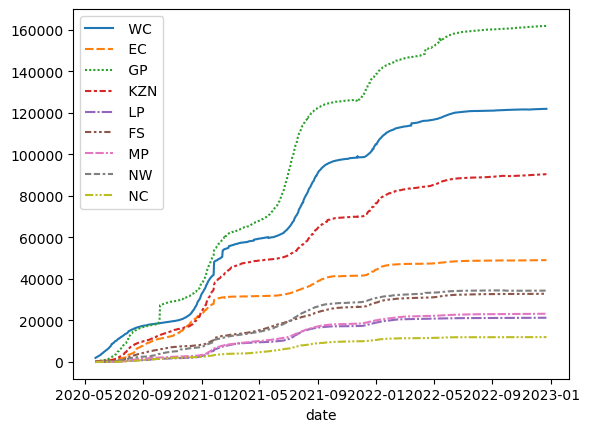

In [34]:
df_line1 =df.set_index('date')[[ ' WC', ' EC', ' GP', ' KZN',
       ' LP', ' FS', ' MP', ' NW', ' NC']] 
sns.lineplot(data = df_line1)

### Patients Discharge Rate and Death Toll: For treatment efectiveness

In [36]:
df['discharge_rate'] =df[' num_discharged_alive']/df[ ' total_admissions']
df['death_rate'] =df[' hospital_deaths']/df[ ' total_admissions']

<Axes: xlabel='date'>

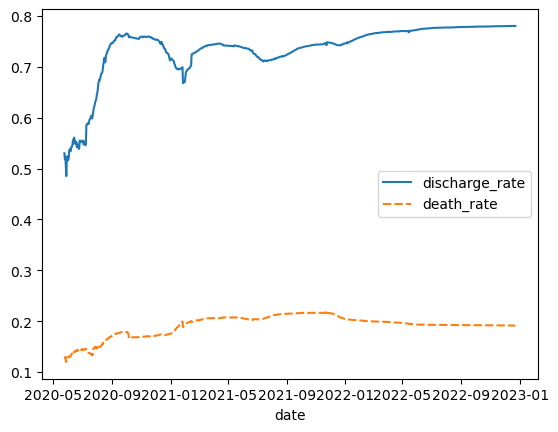

In [38]:
sns.lineplot(df.set_index('date')[['discharge_rate','death_rate' ]])

### Heealthy Centre Types

In [41]:
df2 = pd.read_csv('../data/vwOrgunitStructureOU5.csv')

In [42]:
df2.head() 

,OU2uid,OU2name,OU2code,OU2short,OU3uid,OU3name,OU3code,OU3short,OU4uid,OU4name,...,geometry,longitude,latitude,phonenumber,contactperson,address,OrgUnitOwnership,OrgUnitRuralUrban,OrgUnitType,lastupdated
0,WeeW3tgF69f,ec Eastern Cape Province,431111,Eastern Cape,d12AA2zsVxt,ec Alfred Nzo District Municipality,444212,A Nzo DM,DcoRY6zCheh,ec Matatiele Local Municipality,...,SRID=4326;POINT(28.94812 -30.17988),28.94812,-30.179880,0392567006,The Manager,"Kwa Makhoba Location, Lusikisiki, 4820",Gov Province,Rural,Clinic,2024-08-25 11:43:24.256
1,WeeW3tgF69f,ec Eastern Cape Province,431111,Eastern Cape,d12AA2zsVxt,ec Alfred Nzo District Municipality,444212,A Nzo DM,DcoRY6zCheh,ec Matatiele Local Municipality,...,SRID=4326;POINT(28.80539 -30.342847),28.80539,-30.342847,0397373124,NaN,"Pick'n Pay Centre, Main Road, Matatiele",Private,Urban,Pharmacy,2024-08-25 11:43:24.269
2,WeeW3tgF69f,ec Eastern Cape Province,431111,Eastern Cape,d12AA2zsVxt,ec Alfred Nzo District Municipality,444212,A Nzo DM,DcoRY6zCheh,ec Matatiele Local Municipality,...,NaN,NaN,NaN,NaN,NaN,NaN,Private,Urban,General Practitioner,2024-08-25 11:43:24.3
3,WeeW3tgF69f,ec Eastern Cape Province,431111,Eastern Cape,d12AA2zsVxt,ec Alfred Nzo District Municipality,444212,A Nzo DM,DcoRY6zCheh,ec Matatiele Local Municipality,...,SRID=4326;POINT(28.84811 -30.6329),28.84811,-30.632900,NaN,NaN,NaN,Gov Province,Rural,Clinic,2024-08-25 11:43:24.309
4,WeeW3tgF69f,ec Eastern Cape Province,431111,Eastern Cape,d12AA2zsVxt,ec Alfred Nzo District Municipality,444212,A Nzo DM,DcoRY6zCheh,ec Matatiele Local Municipality,...,SRID=4326;POINT(28.59078 -30.62002),28.59078,-30.620020,NaN,NaN,Zingcuka,Gov Province,Rural,Clinic,2024-08-25 11:43:24.331


In [43]:
df2.columns

Index(['OU2uid', 'OU2name', 'OU2code', 'OU2short', 'OU3uid', 'OU3name',
       'OU3code', 'OU3short', 'OU4uid', 'OU4name', 'OU4code', 'OU4short',
       'OU5uid', 'OU5name', 'OU5code', 'OU5short', 'openingdate', 'closeddate',
       'coordinates', 'geometry', 'longitude', 'latitude', 'phonenumber',
       'contactperson', 'address', 'OrgUnitOwnership', 'OrgUnitRuralUrban',
       'OrgUnitType', 'lastupdated'],
      dtype='object')

In [106]:
df_types = df2.groupby(["OU2short", 'OrgUnitRuralUrban', 'OrgUnitOwnership', 'OrgUnitType'] ).count()['OU2uid']

In [107]:
df_types=df_types.reset_index()

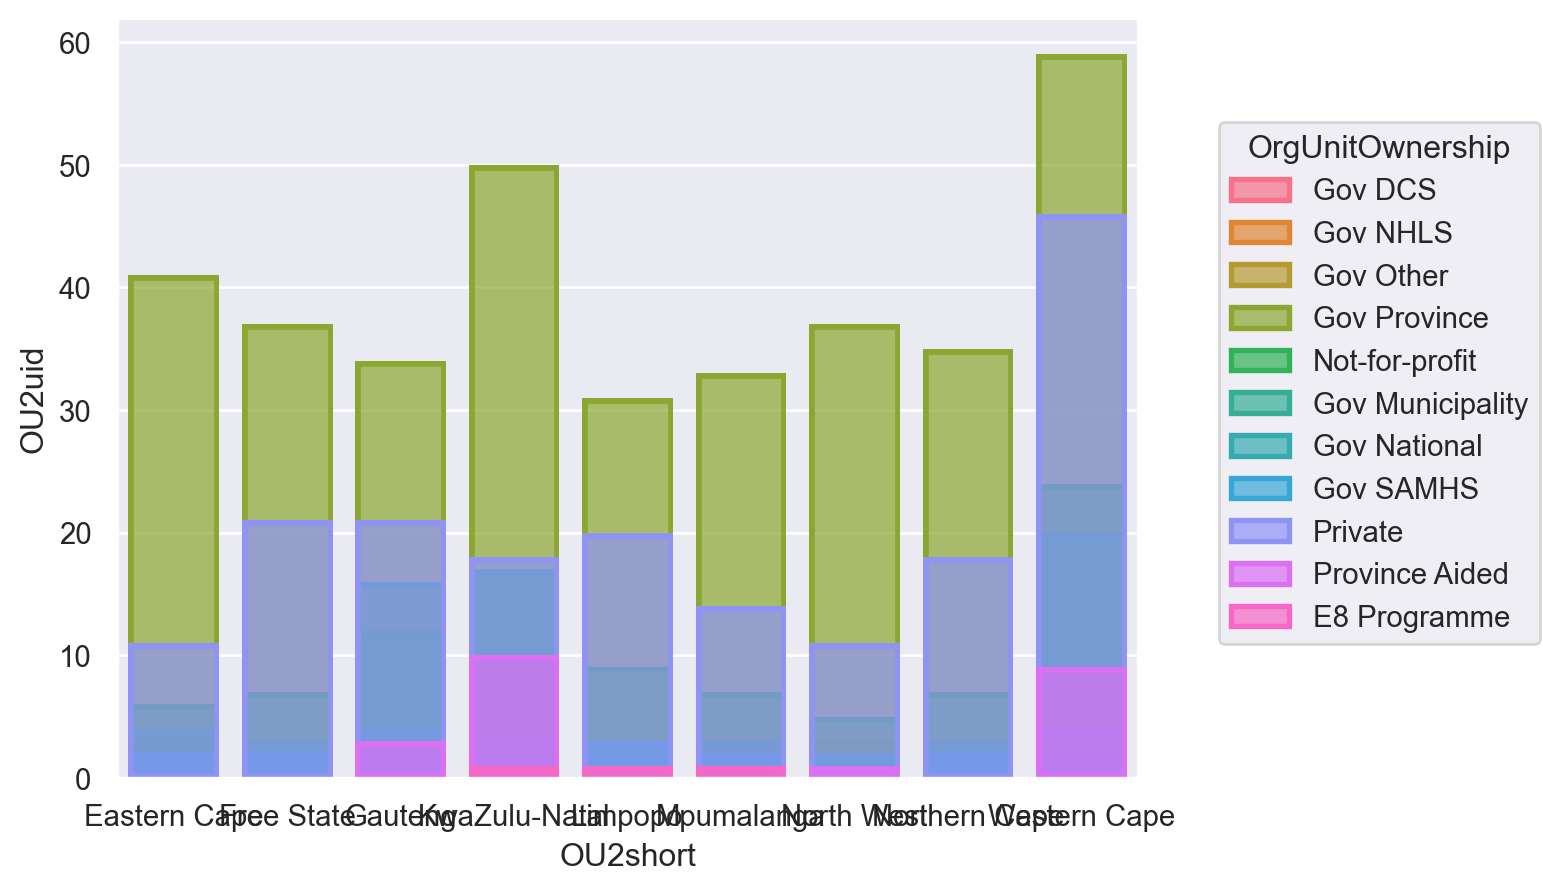

<Figure size 1600x900 with 0 Axes>

In [120]:
import seaborn.objects as so
plt.figure(figsize=(16, 9))

(
    so.Plot(
        df_types, x= "OU2short",y = 'OU2uid',
        color=  "OrgUnitOwnership"
    )
    .add(so.Bar(edgewidth=2), so.Hist())
    )

 


### Positive Test Rates

In [54]:
testing_positive_rates = pd.read_csv('../data/covid19za_provincial_timeline_testing_positivityrate.csv')

In [56]:
testing_positive_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   YYYYMMDD       115 non-null    int64  
 1   Eastern Cape   115 non-null    float64
 2   Free State     115 non-null    float64
 3   Gauteng        115 non-null    float64
 4   KwaZulu-Natal  115 non-null    float64
 5   Limpopo        115 non-null    float64
 6   Mpumalanga     115 non-null    float64
 7   North West     115 non-null    float64
 8   Northern Cape  115 non-null    float64
 9   Western Cape   115 non-null    float64
 10  Total          115 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 10.0 KB


In [57]:
testing_positive_rates.head()

,YYYYMMDD,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
0,20200509,0.057802,0.006278,0.011366,0.012298,0.003801,0.005399,0.006019,0.006110,0.165825,0.049419
1,20200516,0.083700,0.012441,0.019239,0.019024,0.004449,0.021115,0.017268,0.006869,0.184979,0.072533
2,20200523,0.079244,0.010022,0.016835,0.017430,0.006258,0.019777,0.016513,0.007014,0.202416,0.075442
3,20200530,0.108369,0.012535,0.029809,0.041482,0.005939,0.027259,0.036928,0.011516,0.231437,0.095046
4,20200606,0.152343,0.011257,0.052044,0.031598,0.011442,0.043938,0.071616,0.021339,0.245307,0.103705


In [58]:
testing_positive_rates.set_index('YYYYMMDD')

,Eastern Cape,Free State,Gauteng,KwaZulu-Natal,Limpopo,Mpumalanga,North West,Northern Cape,Western Cape,Total
YYYYMMDD,,,,,,,,,,
20200509,0.057802,0.006278,0.011366,0.012298,0.003801,0.005399,0.006019,0.006110,0.165825,0.049419
20200516,0.083700,0.012441,0.019239,0.019024,0.004449,0.021115,0.017268,0.006869,0.184979,0.072533
20200523,0.079244,0.010022,0.016835,0.017430,0.006258,0.019777,0.016513,0.007014,0.202416,0.075442
20200530,0.108369,0.012535,0.029809,0.041482,0.005939,0.027259,0.036928,0.011516,0.231437,0.095046
20200606,0.152343,0.011257,0.052044,0.031598,0.011442,0.043938,0.071616,0.021339,0.245307,0.103705
...,...,...,...,...,...,...,...,...,...,...
20220618,0.067506,0.065439,0.063011,0.040506,0.070299,0.057376,0.078322,0.085106,0.101054,0.064295
20220625,0.042220,0.038336,0.049346,0.030038,0.053290,0.059987,0.060337,0.046137,0.076739,0.048014
20220702,0.065647,0.035957,0.044746,0.029673,0.048346,0.051514,0.047192,0.046436,0.056533,0.044616


In [63]:
import datetime

In [69]:
testing_positive_rates['Date']= testing_positive_rates.YYYYMMDD.apply(str)

In [74]:
s = "20120213"
testing_positive_rates['Date_str'] =[ datetime.datetime.strptime(s, '%Y%m%d') for s in testing_positive_rates['Date'] ]

In [79]:
findal_df =testing_positive_rates.drop(['Date','YYYYMMDD' ], axis =1).set_index('Date_str') 

<Axes: xlabel='Date_str'>

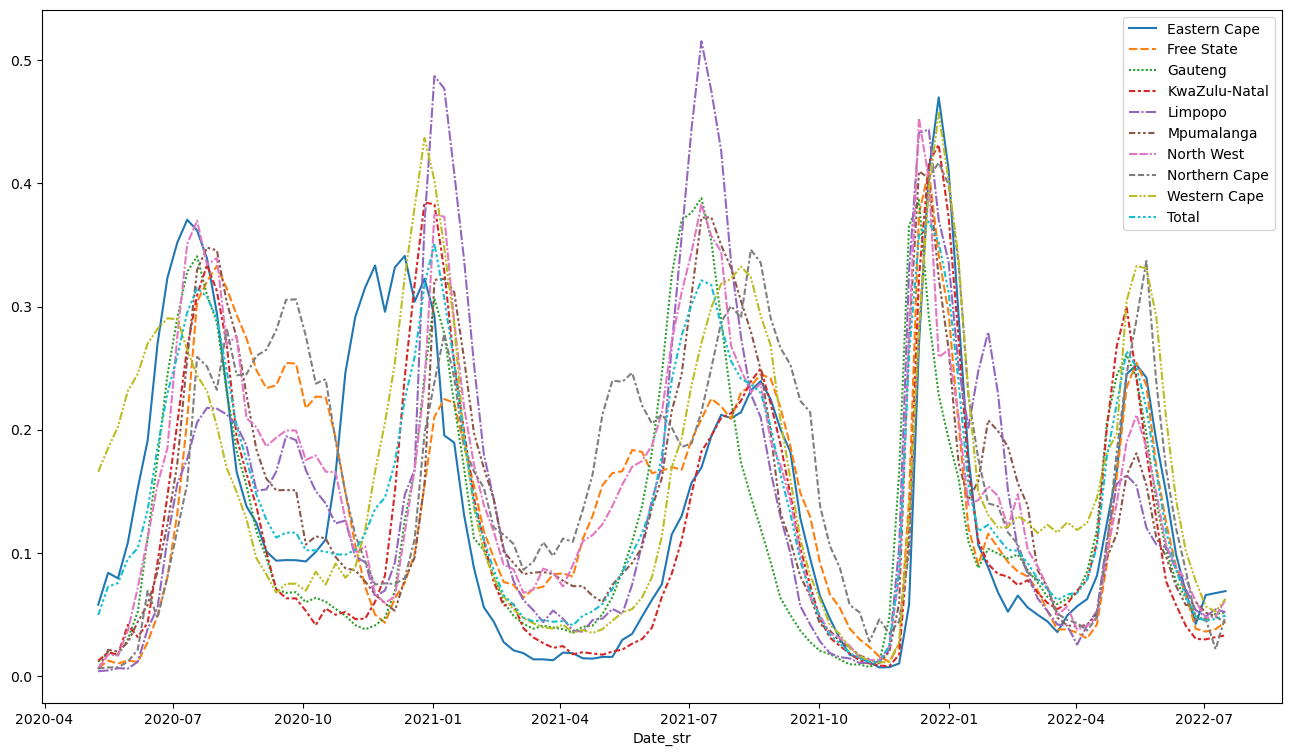

In [82]:

plt.figure(figsize=(16, 9))
sns.lineplot(data = findal_df)